# Calculando Value at Risk (VAR)

1.0 - Importando bibliotecas

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns

2.0 - Construir a carteira

In [3]:
ativos = ['ITSA4.SA',
          'PETR4.SA',
          'ABEV3.SA',
          'VALE3.SA'
          ]

In [4]:
pesos = np.array([0.25,0.25,0.25,0.25])

In [5]:
carteira = yf.download(ativos, start = '2016-01-01', end = '2020-12-30')['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [6]:
carteira.head()

,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,,
2016-01-04,13.508916,2.972660,2.435921,7.997641
2016-01-05,13.720854,3.022204,2.368552,7.890501
2016-01-06,13.587412,3.049229,2.269272,7.310689
2016-01-07,13.226337,3.004188,2.219632,6.875827
2016-01-08,13.399026,3.004188,2.223177,6.642642


3.0 Análises da carteira

In [7]:
retornos = carteira.pct_change()
retornos.head()

,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.015689,0.016667,-0.027657,-0.013396
2016-01-06,-0.009725,0.008942,-0.041916,-0.073482
2016-01-07,-0.026574,-0.014771,-0.021875,-0.059483
2016-01-08,0.013056,0.000000,0.001597,-0.033914


In [8]:
retorno_carteira = (retornos * pesos).sum(axis=1)
retorno_carteira

Date
2016-01-04    0.000000
2016-01-05   -0.002174
2016-01-06   -0.029045
2016-01-07   -0.030676
2016-01-08   -0.004815
                ...   
2020-12-21   -0.023114
2020-12-22    0.004534
2020-12-23    0.013108
2020-12-28    0.009054
2020-12-29    0.004448
Length: 1244, dtype: float64

In [9]:
retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retornos'] = retorno_carteira
retorno_portfolio

,Retornos
Date,
2016-01-04,0.000000
2016-01-05,-0.002174
2016-01-06,-0.029045
2016-01-07,-0.030676
2016-01-08,-0.004815
...,...
2020-12-21,-0.023114
2020-12-22,0.004534
2020-12-23,0.013108


In [10]:
# Representação gráfica dos retornos

fig = go.Figure()
fig.add_trace(go.Histogram(x=retorno_portfolio['Retornos'], nbinsx=80))
fig.update_layout(title_text= 'Distribuição dos Retornos Carteira', template = 'simple_white')
fig.show()

4.0 Value at Risk (VaR) Histórico

In [11]:
# Existe 5% de chance das perdas diárias excederem o valor de 2,67%

var_95 = np.nanpercentile(retorno_portfolio, 5)
var_95

-0.026708255232575362

In [12]:
var_98 = np.nanpercentile( retorno_portfolio, 2)
var_98

-0.03814879451589442

In [13]:
var_99 = np.nanpercentile( retorno_portfolio, 1)
var_99

-0.048116420102195086

<Axes: xlabel='Retornos', ylabel='Count'>

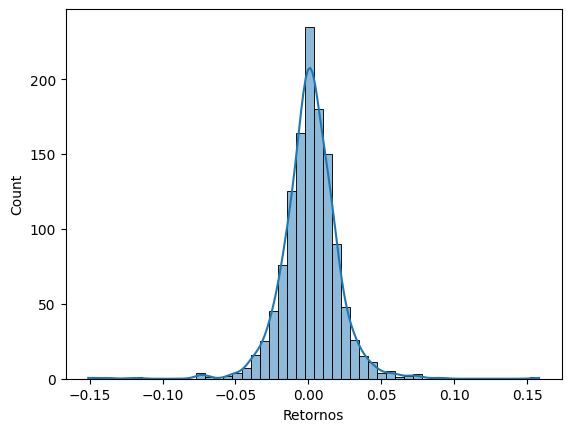

In [16]:

sns.histplot(data = retorno_portfolio ,x = 'Retornos', bins=50, kde= True)

In [17]:
var_99 = np.nanpercentile( retorno_portfolio, 99)
var_99

0.05302485007567289